<a href="https://colab.research.google.com/github/taliyameyswara/emotional-speech-classification/blob/main/Emotional_Speech_Classification_Using_ANN_Kelompok_5_A11_44UG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotional Speech Classification Using ANN 🗣️🔉**
> 👯‍♀️ Kelompok 5 - A11.44UG1 <br>
> 📡 Data Sinyal <br>
> 🙏 Model Overfiting <br>


In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# **Mempersiapkan Dataset 🔋**
Menggunakan [Dataset Toronto Emotional Speech Set Tess](https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess) dari kaggle.

In [2]:
import pandas as pd
import numpy as np
import os # Provides a way of using operating system dependent functionality.
import seaborn as sns
import matplotlib.pyplot as plt # Enable plot in the notebook
import librosa # Librosa provides the audio analysis
import librosa.display # Need to implictly import from librosa
from IPython.display import Audio # Import the audio playback widget
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"taliyameyswara","key":"f1f7923ce6f64df970c7fec88b14b142"}'}

In [5]:
# Membuat directory bernama kaggle dan copy file kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# Mengubah permission file
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Mengunduh Dataset
dataset_name = 'ejlok1/toronto-emotional-speech-set-tess'
!kaggle datasets download -d {dataset_name}

 97% 417M/428M [00:04<00:00, 49.8MB/s]
100% 428M/428M [00:05<00:00, 89.4MB/s]


# **Ekstrasi Data 💥**

In [7]:
# Melakukan ekstraksi pada file zip
import zipfile,os

# Lokasi file zip yang telah diunduh
local_zip = 'toronto-emotional-speech-set-tess.zip'

# Membuat direktori baru bernama "dataset" jika belum ada
dataset_dir = 'dataset'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

zip_ref = zipfile.ZipFile(local_zip, 'r')
# Mengekstrak semua isi file zip ke direktori "dataset"
zip_ref.extractall(dataset_dir)
zip_ref.close()

# Menampilkan daftar file dan folder di dalam direktori "dataset"
print(os.listdir(dataset_dir))

['TESS Toronto emotional speech set data', 'tess toronto emotional speech set data']


In [8]:
paths = []
labels = []
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is already Loaded!')

Dataset is already Loaded!


In [9]:
paths[:5]

['dataset/TESS Toronto emotional speech set data/YAF_neutral/YAF_team_neutral.wav',
 'dataset/TESS Toronto emotional speech set data/YAF_neutral/YAF_shack_neutral.wav',
 'dataset/TESS Toronto emotional speech set data/YAF_neutral/YAF_sure_neutral.wav',
 'dataset/TESS Toronto emotional speech set data/YAF_neutral/YAF_walk_neutral.wav',
 'dataset/TESS Toronto emotional speech set data/YAF_neutral/YAF_name_neutral.wav']

In [10]:
# length of the dataset samples
len(paths)

2800

In [11]:
# Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,dataset/TESS Toronto emotional speech set data...,neutral
1,dataset/TESS Toronto emotional speech set data...,neutral
2,dataset/TESS Toronto emotional speech set data...,neutral
3,dataset/TESS Toronto emotional speech set data...,neutral
4,dataset/TESS Toronto emotional speech set data...,neutral


In [12]:
# count the all label
df['label'].value_counts()

label
neutral    400
happy      400
ps         400
sad        400
fear       400
angry      400
disgust    400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

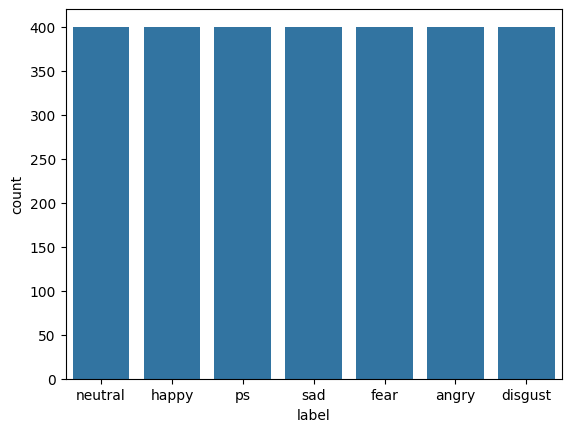

In [13]:
# data analysis of all label
sns.countplot(x = df['label'], data=df)

In [18]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(5,3))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    x_db = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(5,3))
    plt.title(emotion, size=20)
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

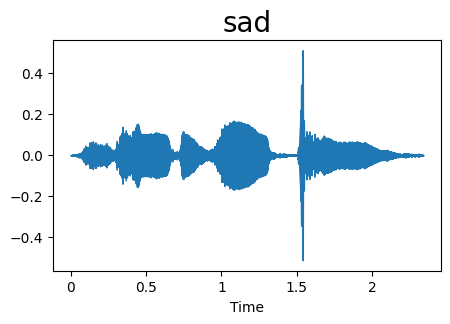

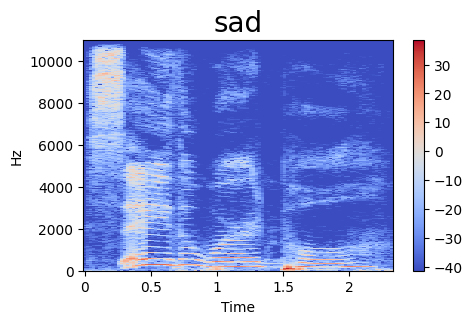

In [19]:
# sad label emotion speech analysis
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

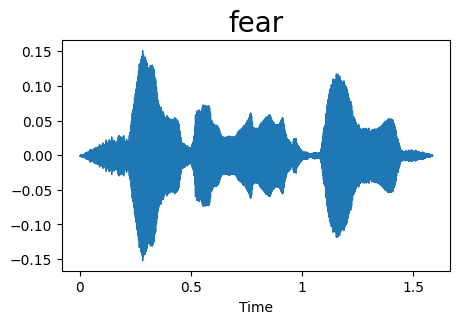

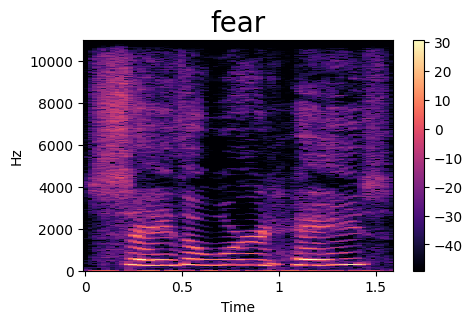

In [20]:
# fear label emotion speech analysis
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

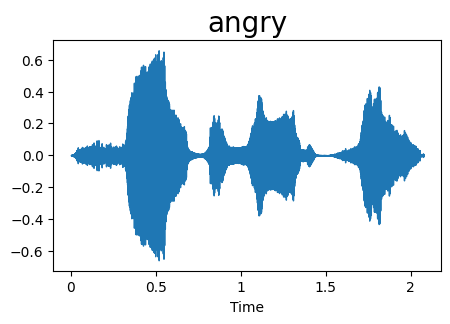

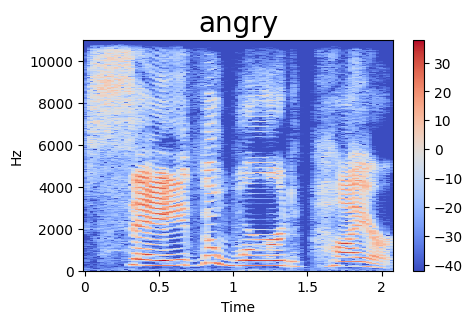

In [21]:
# angry label emotion speech analysis
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

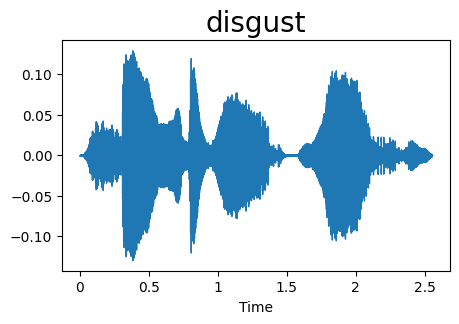

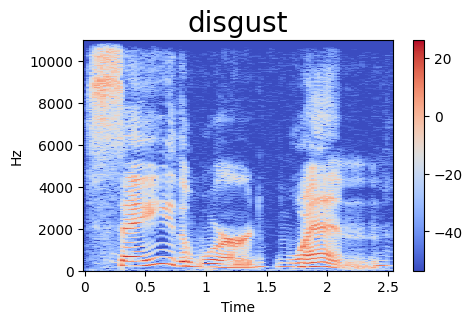

In [22]:
# disgust label emotion speech analysis
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

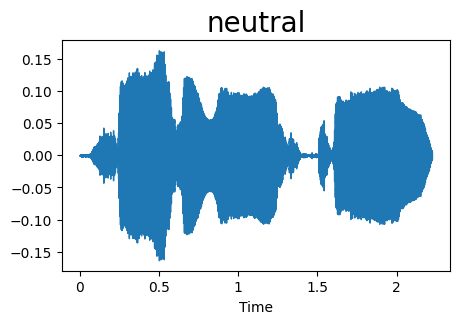

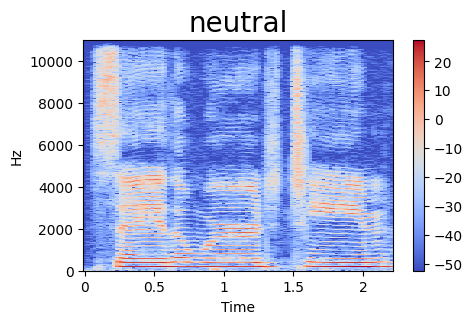

In [23]:
# neutral label emotion speech analysis
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

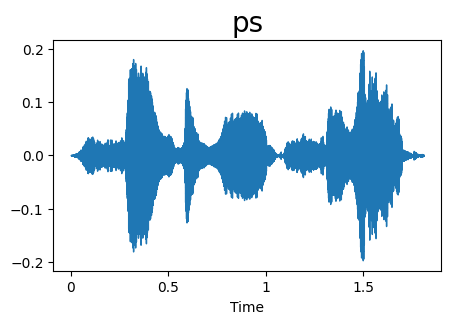

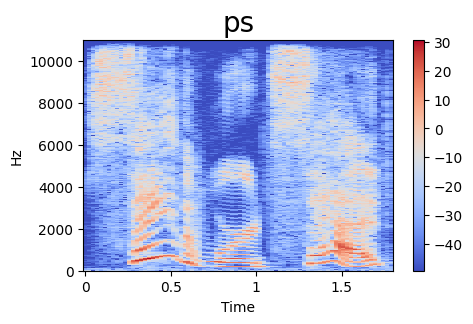

In [24]:
# ps label emotion speech analysis
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

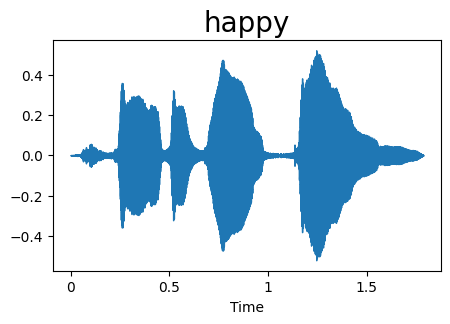

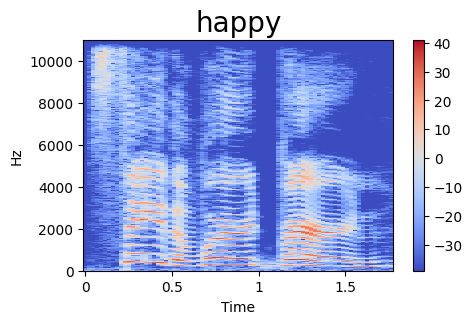

In [25]:
# happy label emotion speech analysis
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Feature Extraction 🧩**
> Ekstrasi MFCC dari fitur audio yang diberikan

In [26]:
def feature_extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

> Hasil ekstrasi audio menjadi vektor fitur

In [27]:
feature_extract_mfcc(df['speech'][0])

array([-3.86402039e+02,  7.07147369e+01, -8.79879761e+00,  4.94672127e+01,
        3.12836432e+00, -8.51998711e+00,  7.40386152e+00, -1.87784863e+01,
       -7.67125654e+00,  2.89041901e+00, -2.12466297e+01,  5.62256527e+00,
       -6.27022791e+00, -4.58608246e+00,  5.42053413e+00, -1.05348978e+01,
        4.95330811e-01,  4.62655544e+00, -2.00970325e+01,  2.70525694e+00,
       -1.03548975e+01, -5.71313477e+00, -8.92729759e+00, -4.58559990e+00,
       -1.01127377e+01, -2.11260223e+00, -3.47591472e+00, -1.48760188e+00,
       -1.16920481e+01, -6.22099543e+00, -8.44106197e+00,  1.15137968e+01,
        1.96996040e+01,  3.66742897e+01,  4.28813591e+01,  3.03274422e+01,
        1.50255079e+01, -1.42585218e+00, -5.74190092e+00,  3.35960984e-01],
      dtype=float32)

> Menghasilkan vektor fitur MFCC untuk setiap file audio

In [28]:
mfcc = df['speech'].apply(lambda x: feature_extract_mfcc(x))
mfcc

0       [-386.40204, 70.71474, -8.798798, 49.467213, 3...
1       [-379.5944, 74.28096, -20.734558, 27.009659, 4...
2       [-368.2925, 100.5895, 2.3215117, 23.418211, 1....
3       [-400.19696, 97.025345, -13.74003, 17.86949, -...
4       [-414.33603, 89.18805, -9.753028, 38.15309, 7....
                              ...                        
2795    [-525.7402, 100.4599, 25.461254, -2.8482752, 4...
2796    [-522.32336, 94.9513, 26.277546, -9.862188, 10...
2797    [-506.40408, 100.25555, 16.623465, -0.26151592...
2798    [-483.50302, 77.119736, 23.282986, -5.2283573,...
2799    [-511.89774, 93.7326, 21.949944, 0.27078596, 1...
Name: speech, Length: 2800, dtype: object

In [29]:
X=[x for x in mfcc]
X=np.array(X)
X.shape ##(jumlah_sampel, dimensi_fitur)

(2800, 40)

> Menambah dimensi baru

In [162]:
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1, 1, 1, 1)

> Label dalam bentuk one-hot encoding <br>
Mengubah 'neutral' menjadi [1, 0], selain itu [0, 0]

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])
y = y.toarray()

In [158]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [159]:
y.shape

(2800, 7)

# **Modelling 👯‍♀️**
> Menggunakan model neural network ANN

In [70]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(40,)),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               4100      
                                                                 
 dense_29 (Dense)            (None, 200)               20200     
                                                                 
 dense_30 (Dense)            (None, 100)               20100     
                                                                 
 dense_31 (Dense)            (None, 7)                 707       
                                                                 
Total params: 45107 (176.20 KB)
Trainable params: 45107 (176.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 1s 10ms/step - loss: 4.4265 - accuracy: 0.3969 - val_loss: 3.4032 - val_accuracy: 0.1571
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.4075 - accuracy: 0.8504 - val_loss: 2.4473 - val_accuracy: 0.5143
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1716 - accuracy: 0.9482 - val_loss: 2.3560 - val_accuracy: 0.4875
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.9763 - val_loss: 2.5592 - val_accuracy: 0.5196
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0824 - accuracy: 0.9754 - val_loss: 2.3264 - val_accuracy: 0.5268
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0588 - accuracy: 0.9862 - val_loss: 2.9109 - val_accuracy: 0.4429
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0648 - accuracy: 0.9830 - val_loss: 3.0427 - val_accuracy: 0.4536
Epoch 8/50
35/35 [=

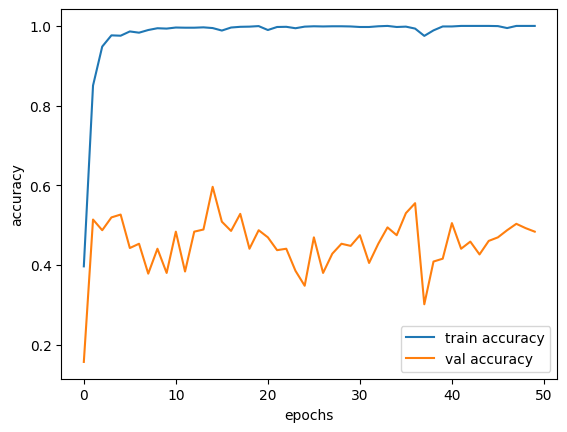

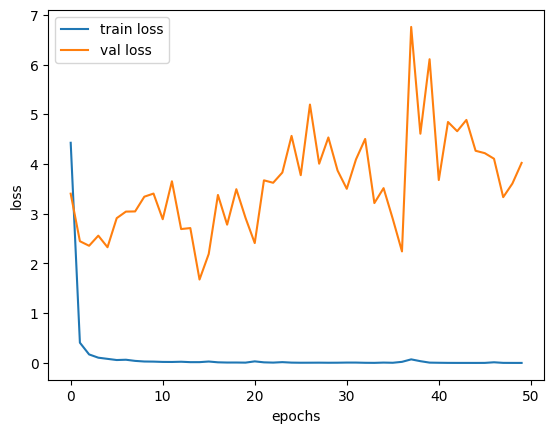

In [73]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [136]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(40,)),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 100)               4100      
                                                                 
 dense_58 (Dense)            (None, 200)               20200     
                                                                 
 dense_59 (Dense)            (None, 100)               20100     
                                                                 
 dense_60 (Dense)            (None, 7)                 707       
                                                                 
Total params: 45107 (176.20 KB)
Trainable params: 45107 (176.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model Overfitting karena akurasi training tinggi tetapi akurasi validasi rendah, maka dapat dilakukan perbaikan seperti berikut

  > Membagi data menjadi data training dan data testing

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2380, 40, 1) (420, 40, 1) (2380, 7) (420, 7)


  > Mengurangi kompleksitas model dengan menghapus satu layer dan menambahkan dropout untuk mengurangi kapasitas model.

In [165]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

new_model = Sequential([
    Dense(100, activation='relu', input_shape=(40,)),
    Dropout(0,2),
    Dense(200, activation='relu'),
    Dropout(0,2),
    # Dense(100, activation='relu'),
    Dense(7, activation='softmax')
])
new_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 100)               4100      
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_71 (Dense)            (None, 200)               20200     
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                                 
 dense_72 (Dense)            (None, 7)                 1407      
                                                                 
Total params: 25707 (100.42 KB)
Trainable params: 25707 (100.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [169]:
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [170]:
history = new_model.fit(X_train,y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_test,y_test))

Epoch 1/50
38/38 [==============================] - 2s 9ms/step - loss: 11.2610 - accuracy: 0.3286 - val_loss: 1.5984 - val_accuracy: 0.5952
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 0.7629 - accuracy: 0.7597 - val_loss: 0.2799 - val_accuracy: 0.9000
Epoch 3/50
38/38 [==============================] - 0s 4ms/step - loss: 0.2376 - accuracy: 0.9172 - val_loss: 0.2311 - val_accuracy: 0.9095
Epoch 4/50
38/38 [==============================] - 0s 4ms/step - loss: 0.1807 - accuracy: 0.9395 - val_loss: 0.1343 - val_accuracy: 0.9619
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 0.1115 - accuracy: 0.9651 - val_loss: 0.1149 - val_accuracy: 0.9643
Epoch 6/50
38/38 [==============================] - 0s 4ms/step - loss: 0.1014 - accuracy: 0.9689 - val_loss: 0.1130 - val_accuracy: 0.9690
Epoch 7/50
38/38 [==============================] - 0s 4ms/step - loss: 0.1125 - accuracy: 0.9597 - val_loss: 0.0776 - val_accuracy: 0.9786
Epoch 8/50
38/38 [=

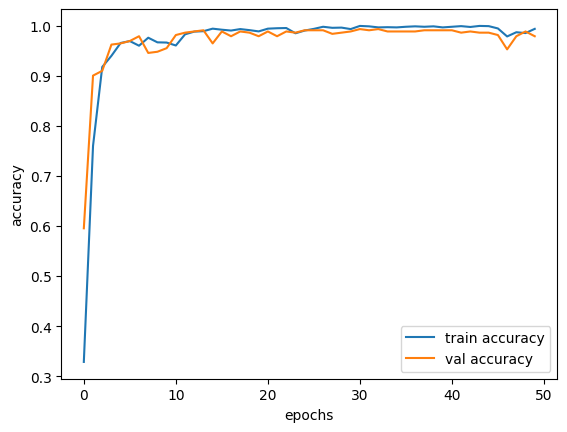

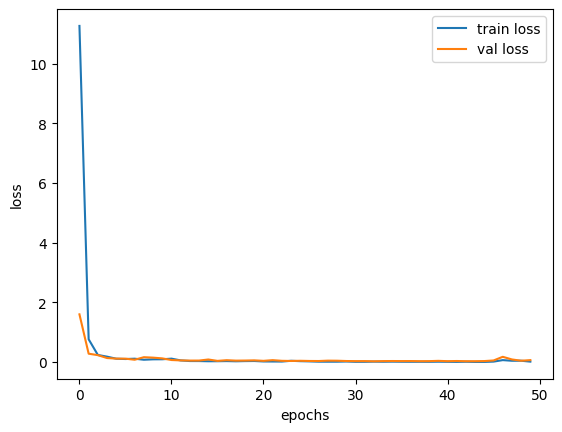

In [171]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [172]:
new_model.evaluate(X_train,y_train)

75/75 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9941


[0.018325448036193848, 0.9941176176071167]

In [173]:
new_model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.9786


[0.06461690366268158, 0.9785714149475098]

In [154]:
!pip install pydub

In [178]:
filename = "dataset/TESS Toronto emotional speech set data/YAF_happy/YAF_bone_happy.wav"
# filename = "owh.wav"
data, i_sr = librosa.load(filename)

# Ekstrak fitur MFCC dengan dimensi yang sesuai
i_f3 = librosa.feature.mfcc(y=data, sr=i_sr, n_mfcc=40)
i_f3 = np.mean(i_f3.T, axis=0)
i_f3 = i_f3.reshape(1, -1)

from sklearn.preprocessing import LabelEncoder

# Mendefinisikan labelencoder dan mengonversi kelas menjadi label
labelencoder = LabelEncoder()
# labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
labelencoder.fit_transform(df[['label']])


# Lakukan prediksi dengan model
predicted_label = new_model.predict(i_f3)
a = np.argmax(predicted_label, axis=1)
b = labelencoder.inverse_transform(a)
print(b[0])


1/1 [==============================] - 0s 39ms/step
happy
